In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
data_path = '/content/drive/MyDrive/data2.txt'
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


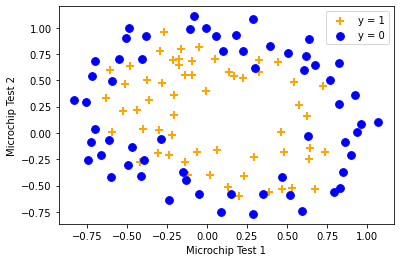

In [30]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);


plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [31]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

In [32]:
##all possible combination of x and y for given degrees
def mapFeature( x1col, x2col):
    degrees = 8
    out = np.ones( (x1col.shape[0], 1) )
    # print(out.shape)

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out = np.hstack(( out, term ))
    return out

In [33]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 45)


In [34]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [35]:
#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [36]:
def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))
    return g

In [37]:
def compute_gradient_logistic(X, y, w):
  m,n = X.shape
  data = np.zeros((n,))

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w))               
    err_i  = f_wb_i  - y[i]                    
    for j in range(n):
      data[j] = data[j] + err_i * X[i,j]        
  data_path = data/m                                  
      
  return data

In [38]:
# from scipy import optimize
import copy
import math
initial_theta = np.zeros(XX.shape[1])
print(initial_theta.shape)

def optimizeRegularizedTheta(mytheta, myX, myy, alpha, num_iters, mylambda=0.):
  m = myX.shape[0]
  lisst = []
  w = copy.deepcopy(mytheta)

  for i in range(num_iters):
  
    val = compute_gradient_logistic(myX, myy, w)  
    w = w*(1-alpha*(mylambda/m)) - alpha * val              
  
    if i<100000:     
        lisst.append(computeCost(w, myX, myy, mylambda))

    if i% math.ceil(num_iters / 10) == 0:
        print(f"Iteration {i:4d}: Cost {lisst[-1]}   ")
  return w, min(lisst)
    
theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta.shape)
print(mincost)

(45,)
Iteration    0: Cost 0.652705680288209   
Iteration   10: Cost 0.7075826679223284   
Iteration   20: Cost 0.40294543444994985   
Iteration   30: Cost 0.3589830248176912   
Iteration   40: Cost 0.3503979524114459   
Iteration   50: Cost 0.34543192497453834   
Iteration   60: Cost 0.3417167421156317   
Iteration   70: Cost 0.33877746688582866   
Iteration   80: Cost 0.3363724621434783   
Iteration   90: Cost 0.33435389115699   
(45,)
0.3327873551154346


In [39]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    alpha = .1
    iters = 1000
    
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,alpha, iters,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %f'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.652705680288209   
Iteration  100: Cost 0.3326255330012314   
Iteration  200: Cost 0.3228454543116104   
Iteration  300: Cost 0.31820460235755593   
Iteration  400: Cost 0.3152707121008752   
Iteration  500: Cost 0.31312657278906947   
Iteration  600: Cost 0.31142060235064434   
Iteration  700: Cost 0.3099917526361664   
Iteration  800: Cost 0.3087560350375375   
Iteration  900: Cost 0.3076646977698024   
[ 4.06451736  1.75391875  5.53261557 -6.26916524 -7.80590625 -5.78495341
  2.99128913  0.03903358  3.77527012 -3.32316111 -3.04788234  3.38469572
 -4.3840278  -1.73039939 -7.49739558 -0.42132838 -0.7399608   5.5061
 -4.08102183 -3.45565414  1.09386856 -4.41958179  0.70385648 -0.98477936
  3.37991843 -4.96660857 -2.94123836 -2.2557651  -2.24439598 -0.23949295
  1.63015496 -1.53740833  2.18302266 -2.84151825 -5.02203554  3.57655393
 -5.00467054  0.48486473 -0.37856485  0.84778871 -1.69660244  2.1837686
 -3.30919099 -3.72737569  0.92685789] 

Cost :  0.306696046212

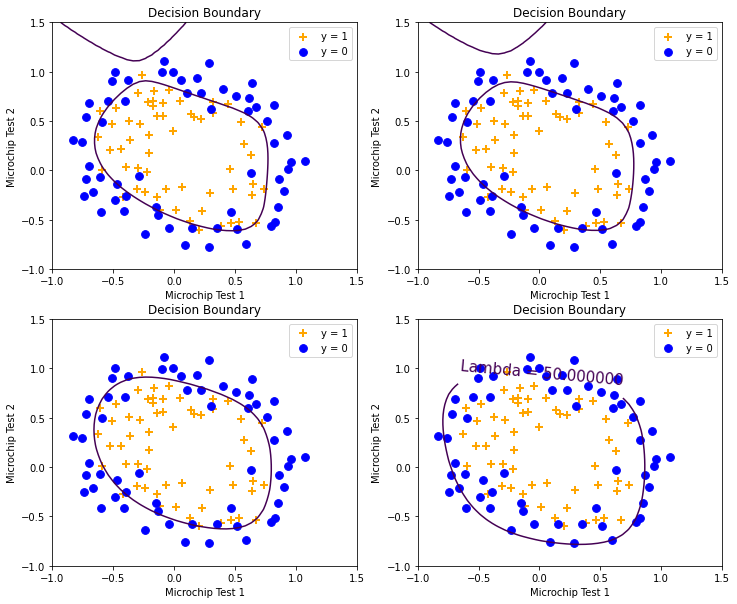

In [40]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,50.)